#Medical Insurance Data Analysis

## Importing Libraries

Here we import all necessary libraries for our data analysis

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

We will download our data set from the website using `wget`

In [114]:
!wget 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

--2024-09-18 11:19:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78536 (77K) [text/csv]
Saving to: ‘medical_insurance_dataset.csv.2’

medical_insurance_d 100%[===================>]  76.70K  --.-KB/s    in 0.02s   

2024-09-18 11:19:00 (3.15 MB/s) - ‘medical_insurance_dataset.csv.2’ saved [78536/78536]



Converting our CSV file to `pandas` dataframe to be used in later analysis

In [115]:
df = pd.read_csv('medical_insurance_dataset.csv')
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


Observing the data we have, we can clearly see that the column names are not correct also some of the data is corrupted. We will move to data preprocessing stage before analysing

## Data Preprocessing

First of all we change the column names for the data to be more readable

In [116]:
headers = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df.columns = headers
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


`df.info()` provides us with brief overview of data to be analysed. We check for any NULL value.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2771 non-null   object 
 1   sex       2771 non-null   int64  
 2   bmi       2771 non-null   float64
 3   children  2771 non-null   int64  
 4   smoker    2771 non-null   object 
 5   region    2771 non-null   int64  
 6   charges   2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


There are no NULL values but we have observed in our data that some rows are filled with '?'. We want to know how much of these are available in each column

In [118]:
(df=='?').sum()

,0
age,4
sex,0
bmi,0
children,0
smoker,7
region,0
charges,0


In [119]:
df.dtypes

,0
age,object
sex,int64
bmi,float64
children,int64
smoker,object
region,int64
charges,float64


We know now that only 'age' and 'smoker' column have invalid '?' values in some of the rows. Also these two rows have data type 'object' we need to tackle that as well.

In [120]:
df['age'] = df['age'].replace('?', np.nan)
df['age'] = df['age'].astype('float64')
df['age'].fillna(df['age'].mean(), inplace=True)

df['smoker'] = df['smoker'].replace('?', np.nan)
df['smoker'] = df['smoker'].astype('float64')
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)

In [121]:
df['charges'] = df['charges'].round(2)

Also checking if there are any rows with zero in them for 'age', 'bmi' and 'charges' column

In [122]:
(df==0).sum()

,0
age,0
sex,0
bmi,0
children,1185
smoker,2208
region,0
charges,0


In [123]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,18.0,2,33.770,1,0.0,4,1725.55
1,28.0,2,33.000,3,0.0,4,4449.46
2,33.0,2,22.705,0,0.0,1,21984.47
3,32.0,2,28.880,0,0.0,1,3866.86
4,31.0,1,25.740,0,0.0,4,3756.62
5,46.0,1,33.440,1,0.0,4,8240.59
6,37.0,1,27.740,3,0.0,1,7281.51
7,37.0,2,29.830,2,0.0,2,6406.41
8,60.0,1,25.840,0,0.0,1,28923.14
9,25.0,2,26.220,0,0.0,2,2721.32


In [124]:
(df=='?').sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [125]:
df.dtypes

,0
age,float64
sex,int64
bmi,float64
children,int64
smoker,float64
region,int64
charges,float64


We finally have a refined data frame which is now suitable for data analysis.

## Exploratory Data Analysis

First of all we check the effect of each attribute on insurance charges

In [126]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
sex,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


The above information shows that smoking has the most impact upon insurance charges followed by Age and BMI

Now we will verify if Age and BMI are good indicators for Insurance Price.

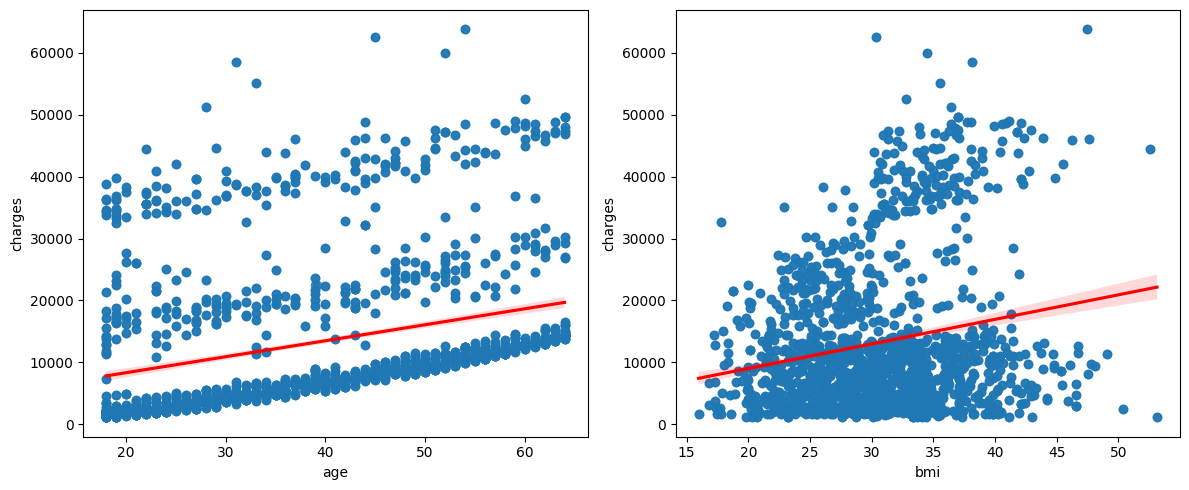

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x='age', y='charges', data=df, line_kws={"color": "red"}, ax = axs[0])
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color": "red"}, ax = axs[1])

plt.tight_layout()
plt.show()

From the fitted line we can see that the two attributes can be good indicators of Insurance charges

We will check how rest of attributes are related to the charges

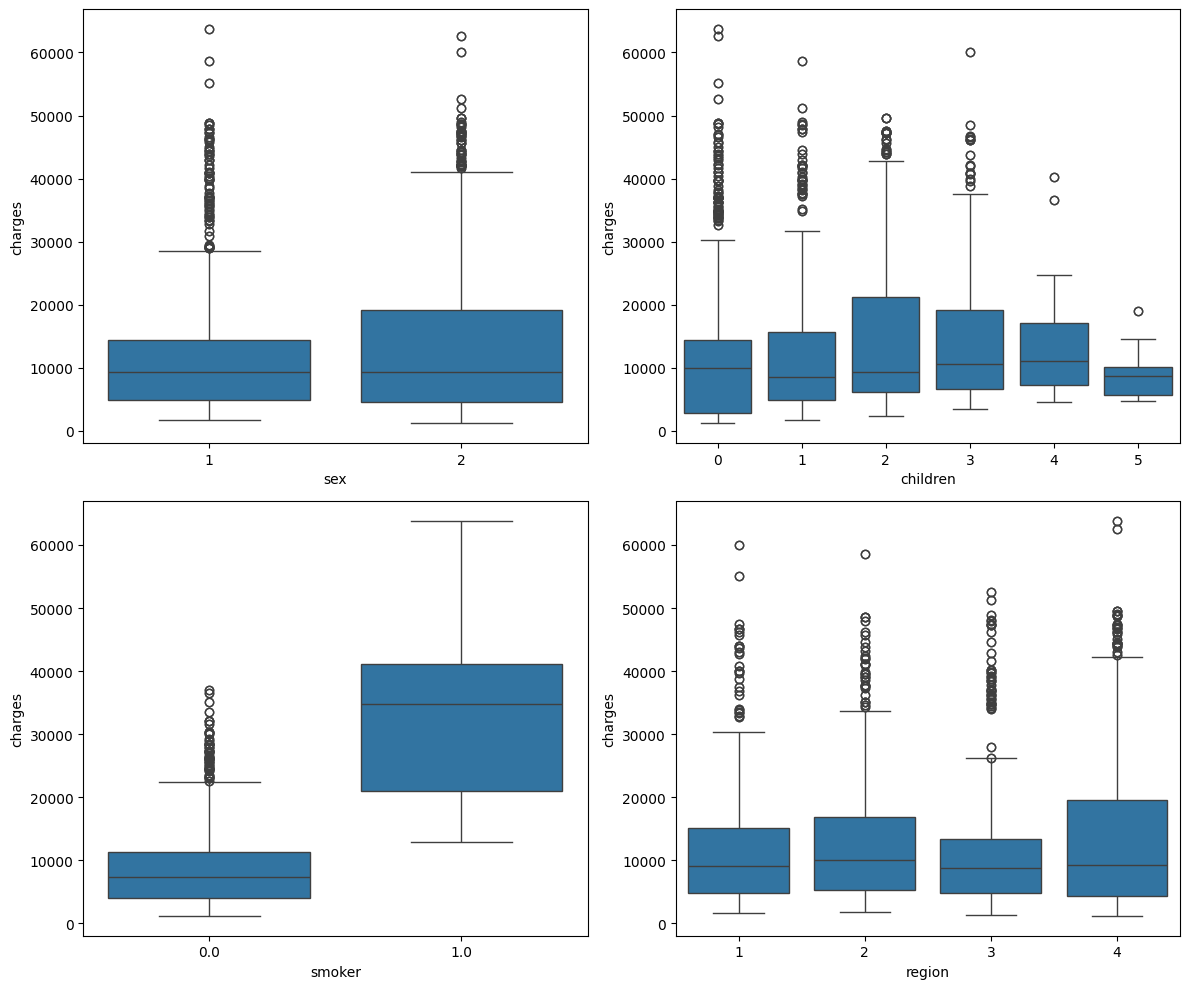

In [128]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='sex', y='charges', data=df, ax = axs[0,0])
sns.boxplot(x='children', y='charges', data=df, ax = axs[0,1])
sns.boxplot(x='smoker', y='charges', data=df, ax = axs[1,0])
sns.boxplot(x='region', y='charges', data=df, ax = axs[1,1])

plt.tight_layout()
plt.show()

From the plots we can extract that:

- The most significant factor influencing medical insurance charges is whether the individual is a smoker, as shown by the stark difference in median and spread of charges between smokers and non-smokers.

- Other factors, such as sex, number of children, and region, show only slight variations in charges, with no major differences in medians or spreads.

## Modelling

**Splitting Data into input output columns**

In [129]:
x_data = df.drop('charges', axis=1)
y_data = df['charges']

**Applying Linear Regression**

In [130]:
model = LinearRegression()
model.fit(x_data, y_data)

preds = model.predict(x_data)
print('Linear Regression R^2: ', model.score(x_data, y_data))

Linear Regression R^2:  0.7505867314418195


The model fits almost fine with 75.05% accuracy

**Pipelining usin Scaling, Polynomial and Linear Reression**

In [131]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_data, y_data)
preds = pipe.predict(x_data)
print('Pipeline R^2: ', pipe.score(x_data, y_data))

Pipeline R^2:  0.8453690587075307


We get a better output with pipeline (84.53% Accuracy)

**Cross Validation**

In [132]:
cvs = cross_val_score(model, x_data, y_data, cv=4)
print('Cross Validation Score: ', cvs)

Cross Validation Score:  [0.75306077 0.74627599 0.75305986 0.74708435]


Pipeline still provides us with better accuracy.

## Model Refinement

The previous models will not perform well on unseen data. For this reason we will split our data into train and test sets to check for better accuracy.

**Splitting into training and test sets**

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2216, 6), (555, 6), (2216,), (555,))

**Using Linear Regression to check how well model performs on unseen data**

In [134]:
model.fit(x_train, y_train)
print('Train R^2: ', model.score(x_train, y_train))
print('Test R^2: ', model.score(x_test, y_test))

Train R^2:  0.7487822114141425
Test R^2:  0.7564592932549773


Small difference is observed between train and test accuracy. So this model performs well on unseen data. But still we need good accuracy

**Testing and comparing polynomial Regression on multiple degrees**

In [135]:
rsqupolytr = []
rsqupolyte = []
for n in range(1,10):
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    rsqupolytr.append(model.score(x_train_poly, y_train))
    rsqupolyte.append(model.score(x_test_poly, y_test))

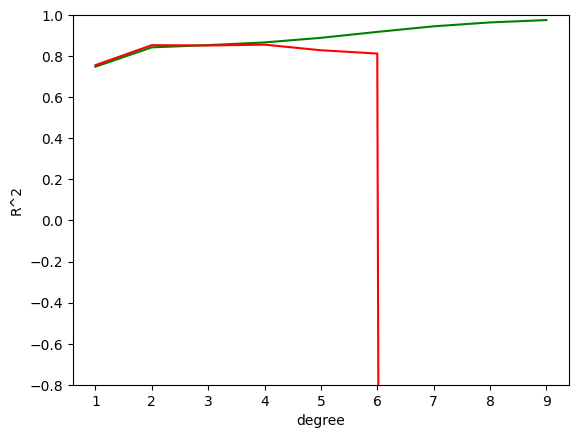

In [136]:
plt.plot(range(1,10), rsqupolytr, 'g')
plt.plot(range(1,10), rsqupolyte, 'r')
plt.xlabel('degree')
plt.ylabel('R^2')
plt.ylim(-0.8,1)
plt.show()

Least difference between training and test accuracy is observed at `degree = 4`. So we check accuracies at this value

In [137]:
model = PolynomialFeatures(degree=4)
x_train_poly = model.fit_transform(x_train)
x_test_poly = model.fit_transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
print('Train R^2: ', model.score(x_train_poly, y_train))
print('Test R^2: ', model.score(x_test_poly, y_test))

Train R^2:  0.86699557207854
Test R^2:  0.8561521217510419


The difference between accuracies is less and also we have better test accuracy.

**Ridge Regression comparison agains multiple alpha values**

In [138]:
alpha = np.arange(0.001, 1, 0.001)
rsqutrain = []
rsqutest = []

for a in alpha:
    model = Ridge(alpha=a)
    model.fit(x_train_poly, y_train)
    rsqutrain.append(model.score(x_train_poly, y_train))
    rsqutest.append(model.score(x_test_poly, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.74479e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.14864e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.72249e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.29604e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarnin

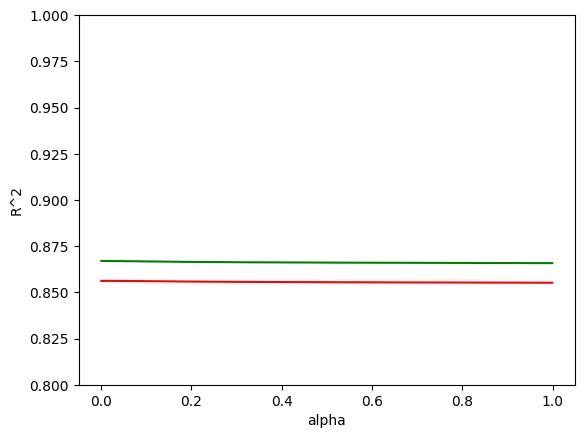

In [139]:
plt.plot(alpha, rsqutrain, 'g')
plt.plot(alpha, rsqutest, 'r')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0.8,1)
plt.show()

The difference in accuracies remains same for all alpha values

In [140]:
model = Ridge(alpha=0.1)
model.fit(x_train_poly, y_train)
print('Train R^2: ', model.score(x_train_poly, y_train))
print('Test R^2: ', model.score(x_test_poly, y_test))

Train R^2:  0.8667002149827083
Test R^2:  0.8560269603748832


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.26237e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


We now have a trained model with good test accuracy (85.6%).

**Random Forest Regression Comparison**

In [141]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

train_predictions = rf_model.predict(x_train)
test_predictions = rf_model.predict(x_test)

train_r2 = rf_model.score(x_train, y_train)
test_r2 = rf_model.score(x_test, y_test)

print("Random Forest Regressor:")
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)


Random Forest Regressor:
Training R-squared: 0.9920862055682939
Test R-squared: 0.9501480827769532


We now have the best test accuracy (95.01%) and also the difference in accuracies is not big.